Multivariate Time Series Problem  
Using LSTM Model (Long Short Term Memory)  
Memprediksi kualitas udara dari data 5 hari terakhir  

Carrissa Gloria Herman  


# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("AP004.csv")
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Eth-Benzene (ug/m3),MP-Xylene (ug/m3),Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-09-05 14:00:00,2017-09-05 15:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,0.10,3.50,NaN,0.10,30.30,69.00,3.20,213.00,372.00,747.00,0.10,33.80,0.00,0.50
1,2017-09-05 15:00:00,2017-09-05 16:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,0.15,2.83,NaN,0.08,30.00,70.50,4.10,140.00,290.75,747.25,0.05,32.22,0.00,0.48
2,2017-09-05 16:00:00,2017-09-05 17:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,0.53,3.05,NaN,0.13,29.85,88.00,2.82,174.75,300.25,747.00,0.00,28.30,0.93,0.53
3,2017-09-05 17:00:00,2017-09-05 18:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,0.48,4.88,NaN,0.28,29.25,88.75,1.72,231.50,225.50,747.75,0.00,28.77,0.00,1.85
4,2017-09-05 18:00:00,2017-09-05 19:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,0.57,5.15,NaN,0.38,28.05,88.50,1.97,105.25,11.25,748.25,0.00,28.25,0.00,2.17


Rename column agar lebih mudah diakses dan mencegah error

In [ ]:
df = df.rename(columns={
    'From Date': 'from_date',
    'To Date': 'to_date',
    'PM2.5 (ug/m3)': 'pm2_5',
    'PM10 (ug/m3)': 'pm10',
    'NO (ug/m3)': 'no',
    'NO2 (ug/m3)': 'no2',
    'NOx (ppb)': 'nox',
    'NH3 (ug/m3)': 'nh3',
    'SO2 (ug/m3)': 'so2',
    'CO (mg/m3)': 'co',
    'Ozone (ug/m3)': 'ozone',
    'Benzene (ug/m3)': 'benzene',
    'Toluene (ug/m3)': 'toluene',
    'Eth-Benzene (ug/m3)': 'eth_benzene',
    'MP-Xylene (ug/m3)': 'mp_xylene',
    'Temp (degree C)': 'temp',
    'RH (%)': 'rh',
    'WS (m/s)': 'ws',
    'WD (degree)': 'wd',
    'SR (W/mt2)': 'sr',
    'BP (mmHg)': 'bp',
    'VWS (m/s)': 'vws',
    'AT (degree C)': 'at',
    'RF (mm)': 'rf',
    'Xylene (ug/m3)': 'xylene'
})


In [ ]:
df.head()

,from_date,to_date,pm2_5,pm10,no,no2,nox,nh3,so2,co,ozone,benzene,toluene,eth_benzene,mp_xylene,temp,rh,ws,wd,sr,bp,vws,at,rf,xylene
0,2017-09-05 14:00:00,2017-09-05 15:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,0.10,3.50,NaN,0.10,30.30,69.00,3.20,213.00,372.00,747.00,0.10,33.80,0.00,0.50
1,2017-09-05 15:00:00,2017-09-05 16:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,0.15,2.83,NaN,0.08,30.00,70.50,4.10,140.00,290.75,747.25,0.05,32.22,0.00,0.48
2,2017-09-05 16:00:00,2017-09-05 17:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,0.53,3.05,NaN,0.13,29.85,88.00,2.82,174.75,300.25,747.00,0.00,28.30,0.93,0.53
3,2017-09-05 17:00:00,2017-09-05 18:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,0.48,4.88,NaN,0.28,29.25,88.75,1.72,231.50,225.50,747.75,0.00,28.77,0.00,1.85
4,2017-09-05 18:00:00,2017-09-05 19:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,0.57,5.15,NaN,0.38,28.05,88.50,1.97,105.25,11.25,748.25,0.00,28.25,0.00,2.17


In [ ]:
# reorder df, taruh at (target variable) ke belakang
df = pd.concat([
    df.iloc[:, 0:22],   # columns 0 to 21
    df.iloc[:, 23:-1],  # column 23
    df.iloc[:, 22:23],  # column 22
], axis=1)
df.head()

,from_date,to_date,pm2_5,pm10,no,no2,nox,nh3,so2,co,ozone,benzene,toluene,eth_benzene,mp_xylene,temp,rh,ws,wd,sr,bp,vws,rf,at
0,2017-09-05 14:00:00,2017-09-05 15:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,0.10,3.50,NaN,0.10,30.30,69.00,3.20,213.00,372.00,747.00,0.10,0.00,33.80
1,2017-09-05 15:00:00,2017-09-05 16:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,0.15,2.83,NaN,0.08,30.00,70.50,4.10,140.00,290.75,747.25,0.05,0.00,32.22
2,2017-09-05 16:00:00,2017-09-05 17:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,0.53,3.05,NaN,0.13,29.85,88.00,2.82,174.75,300.25,747.00,0.00,0.93,28.30
3,2017-09-05 17:00:00,2017-09-05 18:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,0.48,4.88,NaN,0.28,29.25,88.75,1.72,231.50,225.50,747.75,0.00,0.00,28.77
4,2017-09-05 18:00:00,2017-09-05 19:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,0.57,5.15,NaN,0.38,28.05,88.50,1.97,105.25,11.25,748.25,0.00,0.00,28.25


## Plot Time Series Data

In [ ]:
df_at=pd.concat([df['from_date'], df['at']], axis=1)
df_at = df_at.set_index('from_date')
df_at.head()

,at
from_date,
2017-09-05 14:00:00,33.80
2017-09-05 15:00:00,32.22
2017-09-05 16:00:00,28.30
2017-09-05 17:00:00,28.77
2017-09-05 18:00:00,28.25


Text(0, 0.5, 'Air Quality')

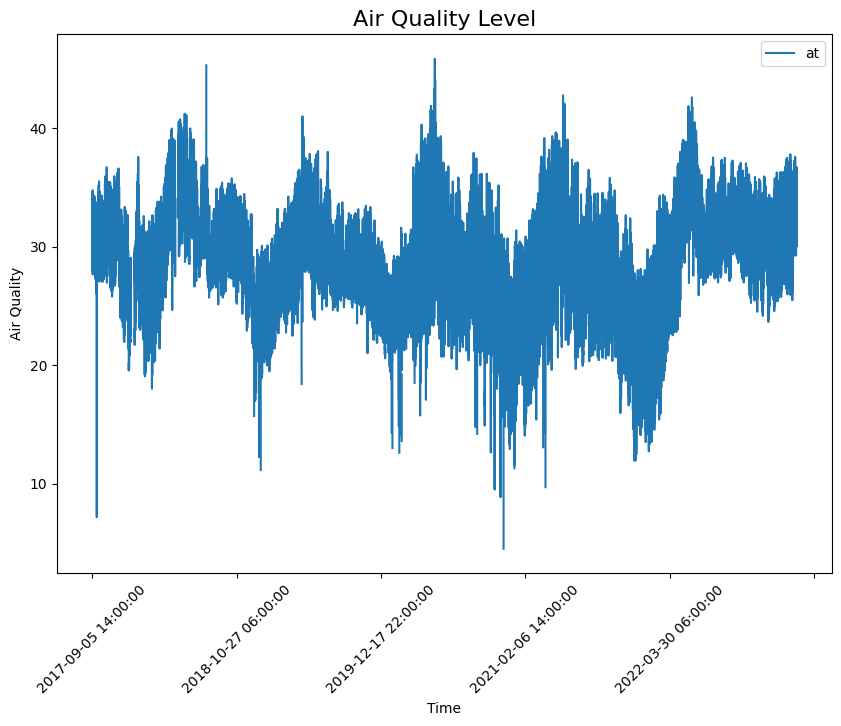

In [ ]:
df_at.plot(figsize=(10,7))
plt.title('Air Quality Level',fontsize=16)
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Air Quality')

Saya menvisualisasikan air quality untuk melihat apakah ada meaningful pattern dari data tersebut yang bisa ditangkap oleh model. Jika tidak ada pattern apa pun, maka tidak ada gunanya membuat model karena model tidak akan dapat memprediksi air quality dengan baik.

In [ ]:
df.shape

(48802, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48802 entries, 0 to 48801
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   from_date    48802 non-null  object 
 1   to_date      48802 non-null  object 
 2   pm2_5        46344 non-null  float64
 3   pm10         46917 non-null  float64
 4   no           47244 non-null  float64
 5   no2          47224 non-null  float64
 6   nox          46628 non-null  float64
 7   nh3          47140 non-null  float64
 8   so2          46649 non-null  float64
 9   co           46387 non-null  float64
 10  ozone        47156 non-null  float64
 11  benzene      46914 non-null  float64
 12  toluene      46908 non-null  float64
 13  eth_benzene  23988 non-null  float64
 14  mp_xylene    39256 non-null  float64
 15  temp         21599 non-null  float64
 16  rh           47364 non-null  float64
 17  ws           47375 non-null  float64
 18  wd           47373 non-null  float64
 19  sr  

# Preprocessing

In [ ]:
df.isna().sum()

,0
from_date,0
to_date,0
pm2_5,2458
pm10,1885
no,1558
no2,1578
nox,2174
nh3,1662
so2,2153
co,2415


In [ ]:
df.shape

(48802, 24)

Kolum 'eth_benzene' memiliki jumlah missing value 24814 dari total 48802 data (50,85%). Karena jumlah missing value sudah terlalu besar. Jika dilakukan impute missing value, maka data yang dihasilkan tidak akan dapat merepresentasikan nilai aslinya dengan baik. Oleh karena itu, lebih baik kolom 'eth_benzene' di hapus saja.

In [ ]:
df = df.drop('eth_benzene', axis=1)

Preprocessing akan dilakukan menggunakan pipeline. Sebelum impute missing value, cek apakah ada outlier pada tiap variable

In [ ]:
df.columns

Index(['from_date', 'to_date', 'pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3',
       'so2', 'co', 'ozone', 'benzene', 'toluene', 'mp_xylene', 'temp', 'rh',
       'ws', 'wd', 'sr', 'bp', 'vws', 'rf', 'at'],
      dtype='object')

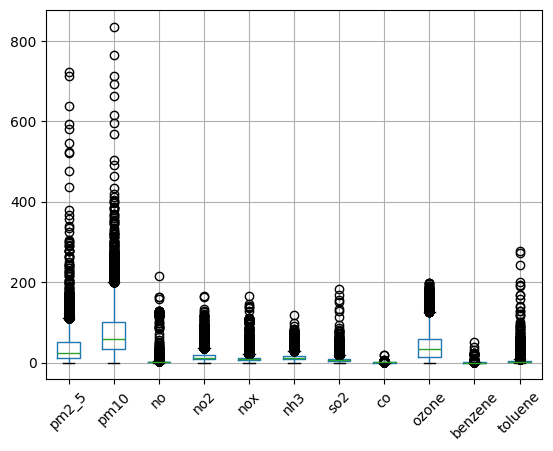

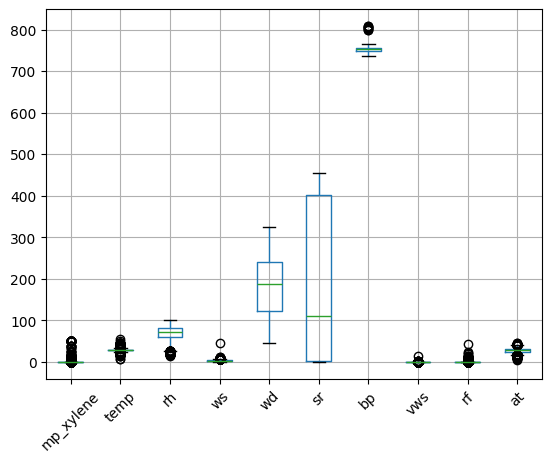

In [ ]:
df.boxplot(['pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3','so2', 'co', 'ozone', 'benzene', 'toluene'])
plt.xticks(rotation=45)
plt.show()

df.boxplot(['mp_xylene', 'temp', 'rh', 'ws', 'wd', 'sr', 'bp', 'vws', 'rf', 'at'])
plt.xticks(rotation=45)
plt.show()

Semua variabel kecuali 'from_date' dan 'to_date' dicek jika memiliki outlier atau tidak. 'from_date' dan 'to_date' tidak dicek karena tidak memiliki missing value, sehingga tidak perlu diketahui dia memiliki outlier atau tidak.  
Ternyata semua variabel kecuali 'wd' dan 'sr' memiliki outlier

In [ ]:
# pisah variabel dengan outlier dan tanpa outlier
outlier_var = ['pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'ozone', 'benzene', 'toluene', 'mp_xylene', 'temp', 'rh', 'ws', 'bp', 'vws', 'rf', 'at']
no_outlier_var = ['wd', 'sr']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
# variable dengan outlier akan di-impute dengan median
# variable tanpa outlier akan di-impute dengan mean
outliers_preprocess = Pipeline([('outliers_imputer', SimpleImputer(strategy='median'))])
no_outliers_preprocess = Pipeline([('no_outliers_imputer', SimpleImputer(strategy='mean'))])

In [ ]:
preprocess=ColumnTransformer(transformers=[
    ('outlier_preprocess', outliers_preprocess, outlier_var),
    ('no_outlier_preprocess', no_outliers_preprocess, no_outlier_var),], remainder='drop')

In [ ]:
preprocess

ColumnTransformer(transformers=[('outlier_preprocess',
                                 Pipeline(steps=[('outliers_imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3',
                                  'so2', 'co', 'ozone', 'benzene', 'toluene',
                                  'mp_xylene', 'temp', 'rh', 'ws', 'bp', 'vws',
                                  'rf', 'at']),
                                ('no_outlier_preprocess',
                                 Pipeline(steps=[('no_outliers_imputer',
                                                  SimpleImputer())]),
                                 ['wd', 'sr'])])

In [ ]:
df_preprocess = preprocess.fit_transform(df)
df_preprocess = pd.DataFrame(df_preprocess, columns=['pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'ozone', 'benzene', 'toluene', 'mp_xylene', 'temp', 'rh', 'ws', 'bp', 'vws', 'rf', 'at', 'wd', 'sr'])

# tambah kembali colum 'from_date' dan 'to_date'
df_preprocess = pd.concat([
    df['from_date'], df['to_date'], df_preprocess], axis=1)
df_preprocess.head(6)

,from_date,to_date,pm2_5,pm10,no,no2,nox,nh3,so2,co,ozone,benzene,toluene,mp_xylene,temp,rh,ws,bp,vws,rf,at,wd,sr
0,2017-09-05 14:00:00,2017-09-05 15:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,0.10,3.50,0.10,30.30,69.00,3.20,747.00,0.10,0.00,33.80,213.00,372.00
1,2017-09-05 15:00:00,2017-09-05 16:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,0.15,2.83,0.08,30.00,70.50,4.10,747.25,0.05,0.00,32.22,140.00,290.75
2,2017-09-05 16:00:00,2017-09-05 17:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,0.53,3.05,0.13,29.85,88.00,2.82,747.00,0.00,0.93,28.30,174.75,300.25
3,2017-09-05 17:00:00,2017-09-05 18:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,0.48,4.88,0.28,29.25,88.75,1.72,747.75,0.00,0.00,28.77,231.50,225.50
4,2017-09-05 18:00:00,2017-09-05 19:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,0.57,5.15,0.38,28.05,88.50,1.97,748.25,0.00,0.00,28.25,105.25,11.25
5,2017-09-05 19:00:00,2017-09-05 20:00:00,7.25,16.75,1.05,30.15,16.90,5.75,4.42,0.69,22.93,0.53,6.40,0.68,28.10,87.25,1.95,749.50,0.05,0.00,28.40,125.50,0.00


In [ ]:
df_preprocess.isna().sum()

,0
from_date,0
to_date,0
pm2_5,0
pm10,0
no,0
no2,0
nox,0
nh3,0
so2,0
co,0


# Split data

In [ ]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

# Ambil data dari keempat kolom
data = df_preprocess.iloc[:, 2:].values # ada kolum target variabelnya juga untuk tentukan y
data_x_var = df_preprocess.iloc[:, 2:-1].values # tanpa kolum target variable untuk tentukan x

window_size = 5
horizon = 1
pd.DataFrame(data).head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,0.10,3.50,0.10,30.30,69.00,3.20,747.00,0.10,0.00,33.80,213.00,372.00
1,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,0.15,2.83,0.08,30.00,70.50,4.10,747.25,0.05,0.00,32.22,140.00,290.75
2,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,0.53,3.05,0.13,29.85,88.00,2.82,747.00,0.00,0.93,28.30,174.75,300.25
3,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,0.48,4.88,0.28,29.25,88.75,1.72,747.75,0.00,0.00,28.77,231.50,225.50
4,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,0.57,5.15,0.38,28.05,88.50,1.97,748.25,0.00,0.00,28.25,105.25,11.25
5,7.25,16.75,1.05,30.15,16.90,5.75,4.42,0.69,22.93,0.53,6.40,0.68,28.10,87.25,1.95,749.50,0.05,0.00,28.40,125.50,0.00


In [ ]:
# Sliding window untuk X
x_all = sliding_window_view(data_x_var, window_shape=(window_size, data_x_var.shape[1]))
x_all = x_all.squeeze(axis=1)  # hilangkan dimensi ekstra
x = x_all[:-horizon]  # potong agar tidak kelebihan untuk y

In [ ]:
# Sliding window untuk y
y = np.array([data[i + window_size : i + window_size + horizon, 0] for i in range(len(data) - window_size - horizon + 1)])

In [ ]:
# Split 80% untuk training
split_idx = int(len(x) * 0.8)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Cek bentuk data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (39037, 5, 20)
y_train shape: (39037, 1)


In [ ]:
# Split 10% untuk testing dan 10% untuk validate dari data test
split_idx = int(len(x_test) * 0.5) #0.5 karena 0.1 adalah 50% dari 0.2
x_val, x_test = x_test[:split_idx], x_test[split_idx:]
y_val, y_test = y_test[:split_idx], y_test[split_idx:]

# Cek bentuk data
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_test shape: (4880, 5, 20)
y_test shape: (4880, 1)
x_val shape: (4880, 5, 20)
y_val shape: (4880, 1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48802 entries, 0 to 48801
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   from_date  48802 non-null  object 
 1   to_date    48802 non-null  object 
 2   pm2_5      46344 non-null  float64
 3   pm10       46917 non-null  float64
 4   no         47244 non-null  float64
 5   no2        47224 non-null  float64
 6   nox        46628 non-null  float64
 7   nh3        47140 non-null  float64
 8   so2        46649 non-null  float64
 9   co         46387 non-null  float64
 10  ozone      47156 non-null  float64
 11  benzene    46914 non-null  float64
 12  toluene    46908 non-null  float64
 13  mp_xylene  39256 non-null  float64
 14  temp       21599 non-null  float64
 15  rh         47364 non-null  float64
 16  ws         47375 non-null  float64
 17  wd         47373 non-null  float64
 18  sr         47146 non-null  float64
 19  bp         47373 non-null  float64
 20  vws   

In [ ]:
df.head()

,from_date,to_date,pm2_5,pm10,no,no2,nox,nh3,so2,co,ozone,benzene,toluene,mp_xylene,temp,rh,ws,wd,sr,bp,vws,rf,at
0,2017-09-05 14:00:00,2017-09-05 15:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,0.10,3.50,0.10,30.30,69.00,3.20,213.00,372.00,747.00,0.10,0.00,33.80
1,2017-09-05 15:00:00,2017-09-05 16:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,0.15,2.83,0.08,30.00,70.50,4.10,140.00,290.75,747.25,0.05,0.00,32.22
2,2017-09-05 16:00:00,2017-09-05 17:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,0.53,3.05,0.13,29.85,88.00,2.82,174.75,300.25,747.00,0.00,0.93,28.30
3,2017-09-05 17:00:00,2017-09-05 18:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,0.48,4.88,0.28,29.25,88.75,1.72,231.50,225.50,747.75,0.00,0.00,28.77
4,2017-09-05 18:00:00,2017-09-05 19:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,0.57,5.15,0.38,28.05,88.50,1.97,105.25,11.25,748.25,0.00,0.00,28.25


# LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

# LSTM layer
model.add(LSTM(units=10, input_shape=(x_train.shape[1], x_train.shape[2])))

# Regressor layer
model.add(Dense(1, activation='linear'))  # total output units

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251 (4.89 KB)

 Trainable params: 1,251 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), shuffle=True, verbose=2)

Epoch 1/10
1220/1220 - 36s - 29ms/step - loss: 1944.0543 - mae: 32.4508 - val_loss: 453.2775 - val_mae: 14.7931
Epoch 2/10
1220/1220 - 22s - 18ms/step - loss: 1652.6730 - mae: 28.1090 - val_loss: 343.9047 - val_mae: 12.4168
Epoch 3/10
1220/1220 - 25s - 21ms/step - loss: 1436.8696 - mae: 25.1307 - val_loss: 280.9859 - val_mae: 11.7589
Epoch 4/10
1220/1220 - 18s - 15ms/step - loss: 1267.8945 - mae: 23.1360 - val_loss: 251.7886 - val_mae: 11.9494
Epoch 5/10
1220/1220 - 27s - 22ms/step - loss: 1136.1702 - mae: 21.8727 - val_loss: 251.5708 - val_mae: 12.6844
Epoch 6/10
1220/1220 - 38s - 31ms/step - loss: 1037.5081 - mae: 21.1621 - val_loss: 275.7822 - val_mae: 13.7813
Epoch 7/10
1220/1220 - 19s - 16ms/step - loss: 969.0440 - mae: 20.9559 - val_loss: 317.9342 - val_mae: 15.2547
Epoch 8/10
1220/1220 - 25s - 21ms/step - loss: 926.4695 - mae: 21.2381 - val_loss: 368.7989 - val_mae: 16.7759
Epoch 9/10
1220/1220 - 23s - 19ms/step - loss: 904.1443 - mae: 21.6233 - val_loss: 417.3051 - val_mae: 18.

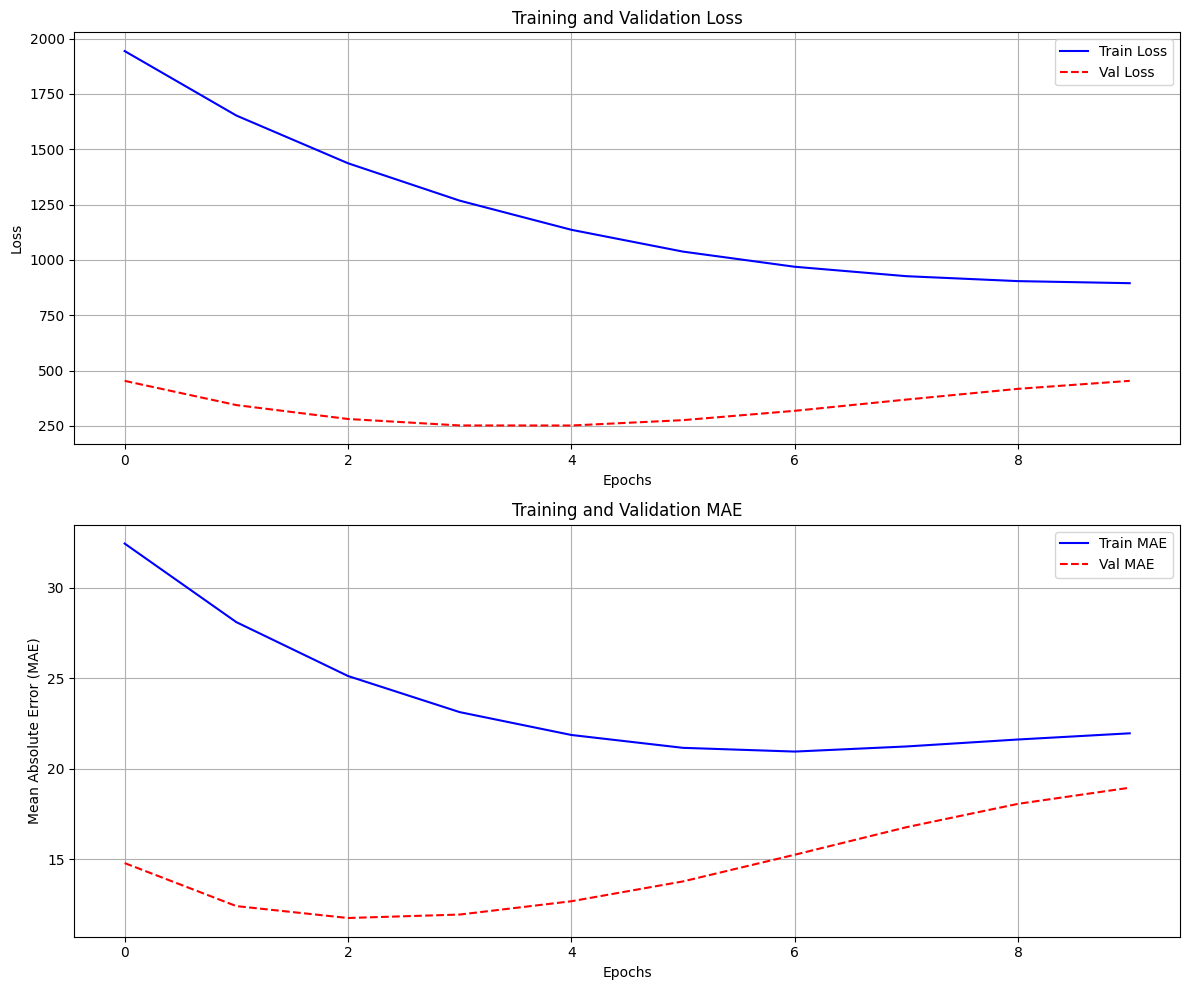

In [ ]:
# Visualisasi Loss dan MAE selama training
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot Loss
ax[0].plot(history.history['loss'], label='Train Loss', linestyle='-', color='blue')
ax[0].plot(history.history['val_loss'], label='Val Loss', linestyle='--', color='red')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

# Plot MAE
ax[1].plot(history.history['mae'], label='Train MAE', linestyle='-', color='blue')
ax[1].plot(history.history['val_mae'], label='Val MAE', linestyle='--', color='red')
ax[1].set_title('Training and Validation MAE')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean Absolute Error (MAE)')
ax[1].legend()
ax[1].grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
# evaluasi model pake test set
test_loss = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

Test Loss: [1464.379638671875, 28.658906936645508]


In [ ]:
# Prediksi pada data test
y_pred = model.predict(x_test)

# Cek prediksi pada indeks pertama test set
print("Predictions on Test Set (Index 0):")
print(y_pred[0])

153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step
Predictions on Test Set (Index 0):
[33.186752]


# Modifikasi LSTM Model

## Ubah Arsitektur Model

Saya menambahkan layer normalization dan melakukan dropout untuk mempercepat learning dan mencegah overfitting pada data. Selain itu, ditambahkan relu layer untuk semakin mendukung performa model. Terakhir, unit pada tiap LSTM layer diperbanyak untuk memperbesar width/internal memory dari tiap LSTM layer yang berarti tiap layer LSTM dapat menganlisa hubungan yang lebih rumit dari data.

In [ ]:
model_modified = Sequential()

# LSTM layer
model_modified.add(LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model_modified.add(BatchNormalization())
model_modified.add(Dropout(0.3))

# LSTM layer 2
model_modified.add(LSTM(units=64, return_sequences=True))
model_modified.add(BatchNormalization())
model_modified.add(Dropout(0.3))

# LSTM layer 3
model_modified.add(LSTM(units=32, return_sequences=False))
model_modified.add(BatchNormalization())
model_modified.add(Dropout(0.3))

# # Regressor layer
model_modified.add(Dense(16, activation='relu'))
model_modified.add(Dense(1, activation='linear'))

# Compile model
model_modified.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [ ]:
history_modified = model_modified.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), shuffle=True, verbose=2)

Epoch 1/10
1220/1220 - 90s - 73ms/step - loss: 422.2470 - mae: 12.7284 - val_loss: 845.1729 - val_mae: 27.3009
Epoch 2/10
1220/1220 - 74s - 61ms/step - loss: 252.7341 - mae: 10.1719 - val_loss: 121.9835 - val_mae: 8.7694
Epoch 3/10
1220/1220 - 82s - 67ms/step - loss: 247.4246 - mae: 10.0092 - val_loss: 109.1152 - val_mae: 8.6233
Epoch 4/10
1220/1220 - 65s - 53ms/step - loss: 242.2598 - mae: 9.8347 - val_loss: 59.5202 - val_mae: 6.0697
Epoch 5/10
1220/1220 - 84s - 69ms/step - loss: 223.9143 - mae: 9.1782 - val_loss: 106.7043 - val_mae: 8.4469
Epoch 6/10
1220/1220 - 82s - 67ms/step - loss: 252.6493 - mae: 9.9444 - val_loss: 55.0847 - val_mae: 5.6923
Epoch 7/10
1220/1220 - 77s - 63ms/step - loss: 226.3059 - mae: 9.2206 - val_loss: 53.1805 - val_mae: 5.7087
Epoch 8/10
1220/1220 - 86s - 70ms/step - loss: 213.8236 - mae: 8.7540 - val_loss: 64.8744 - val_mae: 6.0281
Epoch 9/10
1220/1220 - 80s - 65ms/step - loss: 197.8001 - mae: 8.5537 - val_loss: 64.2982 - val_mae: 5.8541
Epoch 10/10
1220/122

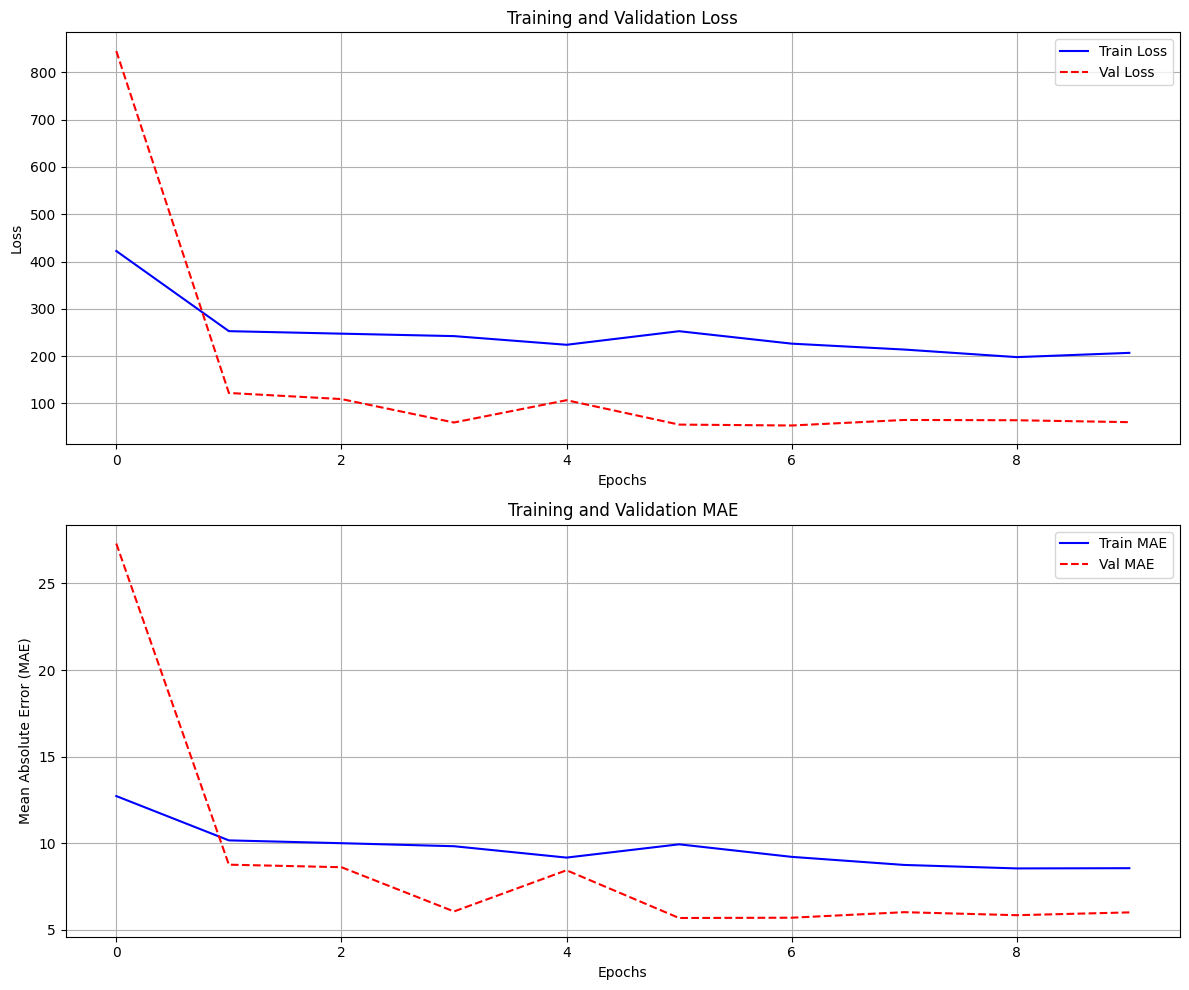

In [ ]:
# Visualisasi Loss dan MAE selama training
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot Loss
ax[0].plot(history_modified.history['loss'], label='Train Loss', linestyle='-', color='blue')
ax[0].plot(history_modified.history['val_loss'], label='Val Loss', linestyle='--', color='red')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

# Plot MAE
ax[1].plot(history_modified.history['mae'], label='Train MAE', linestyle='-', color='blue')
ax[1].plot(history_modified.history['val_mae'], label='Val MAE', linestyle='--', color='red')
ax[1].set_title('Training and Validation MAE')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean Absolute Error (MAE)')
ax[1].legend()
ax[1].grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate model on test set
test_loss = model_modified.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

Test Loss: [241.13941955566406, 9.922353744506836]


In [ ]:
# Prediksi pada data test
y_pred_modified = model_modified.predict(x_test)

# Cek prediksi pada indeks pertama test set
print("Predictions on Test Set (Index 0):")
print(y_pred_modified[0])

153/153 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step
Predictions on Test Set (Index 0):
[9.636783]


# Evaluasi

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Base model

In [ ]:
print('Base model MAE score:', mean_absolute_error(y_test, y_pred))
print('Base model MSE score:', mean_squared_error(y_test, y_pred))
print('Base model R2 score:', r2_score(y_test, y_pred))

Base model MAE score: 28.658918180622038
Base model MSE score: 1464.3793530144183
Base model R2 score: -0.1957010917268791


Modified model

In [ ]:
print('Modified model MAE score:', mean_absolute_error(y_test, y_pred_modified))
print('Modified model MSE score:', mean_squared_error(y_test, y_pred_modified))
print('Modified model R2 score:', r2_score(y_test, y_pred_modified))

Modified model MAE score: 9.92235530888448
Modified model MSE score: 241.13943737034398
Modified model R2 score: 0.8031038283020051


Kesimpulannya adalah modified model bekerja dengan lebih baik daripada base model. Hal ini dilihat dari hasil evaluasi model. Base model mendapatkan R2 score -0.196 yang dianggap sangat buruk, atau model tidak dapat memprediksikan output dengan akurat. Sedangkan modified model, mendapatkan R2 score 0.803 yang menandakan adanya korelasi tinggi antara input dan output dan model dapat memprediksikan output atau 'at' dengan cukup akurat.